## Máquinas de Vetor de Suporte

Uma **Máuina de Vetor de Suporte (SVM)**, inglês *Support Vector Machine* é um tipo de algoritmo de aprendizado de máquina usado principalmente para classificação e regressão.

A ideia central é encontrar a melhor linha ou plano que separe diferentes classes de dados.

**Como funciona?**

Imagina que você tem um monte de dados espalhados em um gráfico, com dois tipos diferentes de pontos. A tarefa da SVM é encontrar a "melhor" linha para separar os pontos difetentes.

A "melhor" linha nesse contexto, não é apenas uma linha qualquer. É a linha que tem a maior margem de separação entre as duas classes. A margem é o espeço entre as linhas e os pontos de dados mais próximos a ela. Esses pontos mais próximos são chamados de vetores de suporte.

A SVM se concentra nesses vetores de suporte porque eles são os mais dificeis de classificar e, ao encontrar o plpano que os separa com maior distância possivel, o algoritmo garante uma separação robusta e generalizada para novos dados.

**Classificação de Margem Rígida (Hard Margin)**

É a forma mais básica de SVM. Ela busca um plano de separação que divida perfeitamente as classes dos dados, sem permitir que nenhum ponto sejam mal classificado ou caia dentro da margem.

Isso funciona bem se os dados forem linearmente separáveis. No entanto, no mundo real raramente os dados são tão limpos.

**O Problema da Margem Rígida**
Imagine um gráfico com pontos azuis e vermelhos. Se tver um único ponto azul no meio da área dos pontos vermelhos, uma SVM de margem rígida vai falhar. Ela não conseguuirá encontrar um linha que separe todos os pontos de forma perfeita e, portanto, não pode construir um modelo.

**Classificação de Margem Suave (Soft Margin)**

A Classificação de Margem Suave relaxa a regra de separação perfeita. Em vez de exigir que todos os pontos estejam do lado certo da margem, ela permite que alguns pontos fiquem mal classificados ou "dentro" da margem.

Para isso, a SVM de margem suave introduz uma variável de penalidade, geralmente chamada de **C**, que controla o quão "suava" a margem pode ser.

* **Valore Pequenos de C:** A penalidade por erros é baixa. O modelo permite mais erros de classificação para encontrar uma margem mais ampla e generalizada. Isso pode levar a um modelo mais simples, mas com risco de subajuste (underfitting).
* **Valore Grander de C:** A penalidade por erros é mais alta. O modelo se esforça para classificar cada ponto corretamente, resultando em uma margem mais estreita. Isso pode levar a um demolo mais complexo, com risco de sobreajuste (overfitting) e pouca generalização para novos dados.

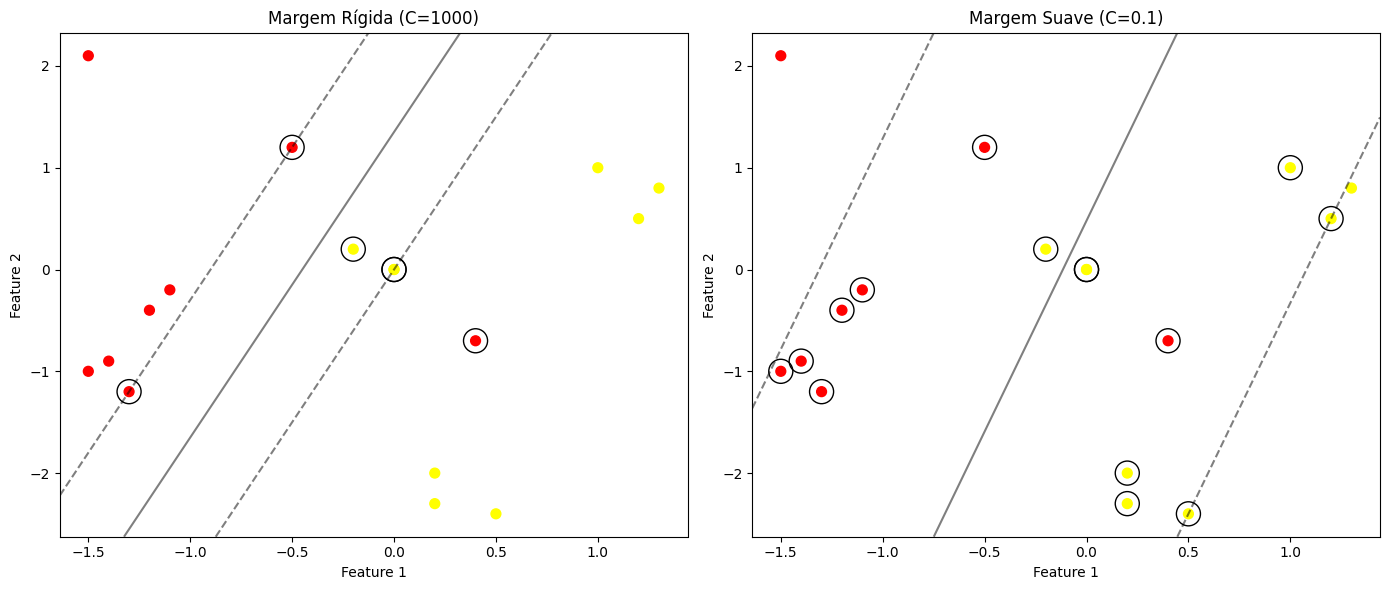

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Gerar dados de exemplo, corrigindo a criação do array para garantir a forma (16, 2)
X = np.array([
    [0.4, -0.7], [-1.5, -1], [-1.4, -0.9], [-1.3, -1.2], [-1.1, -0.2],
    [-1.2, -0.4], [-0.5, 1.2], [-1.5, 2.1], [1, 1], [1.3, 0.8],
    [1.2, 0.5], [0.2, -2], [0.5, -2.4], [0.2, -2.3], [0, 0], [0, 0]
])
y = [0] * 8 + [1] * 8

# Criar uma mancha de dados não separáveis linearmente
X_ruido = np.array([[-0.2, 0.2]])
y_ruido = [1]

# Usar np.vstack para empilhar os arrays de forma segura e explícita
X = np.vstack((X, X_ruido))
y = np.append(y, y_ruido)

# Função para plotar os resultados
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Cria a grade para plotar o modelo
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X_grid = np.meshgrid(y, x)
    xy = np.vstack([X_grid.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X_grid.shape)

    # Plota a fronteira de decisão e as margens
    ax.contour(X_grid, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plota os vetores de suporte
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Criar duas instâncias de SVM
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# SVM com margem rígida (C alto)
ax1.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
model_hard = svm.SVC(kernel='linear', C=1000).fit(X, y)
plot_svc_decision_function(model_hard, ax1)
ax1.set_title('Margem Rígida (C=1000)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# SVM com margem suave (C menor)
ax2.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
model_soft = svm.SVC(kernel='linear', C=0.1).fit(X, y)
plot_svc_decision_function(model_soft, ax2)
ax2.set_title('Margem Suave (C=0.1)')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linera_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X, y)

,steps,"[('scaler', ...), ('linera_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [4]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

**Classificação SVM Não Linear**
Permite separar dados que  não podem ser divididos por uma linha reta.
Inumeros conjuntos de dados nem sequer chegam perto de ter a separabilidade linear. Uma abordagem para lidar com conjuntos de dados não lineares é adicionar mais caracteristicas, como caracteristicas **polinomiais**, em alguns casos isso pode resultar em conjuntos de dados linearmente separáveis.


In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

polynomial_svm_clf.fit(X, y)

,steps,"[('poly_features', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True
